# EDA & ML model for Flight Ticket Price Prediction

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [40]:
df = pd.read_csv('flight.csv')

In [41]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [42]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [43]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


# Description about all columns

1. airline : The name of the airline operating the flight. 
            
        ('SpiceJet': 1, 'AirAsia': 2, 'Vistara': 3, 'GO_FIRST': 5, 'Indigo': 6, 'Air_India': 7)

2. flight : The flight number.
3. source_city : The city from which the flight departs.

        ('Delhi':1, 'Mumbai':2, 'Bangalore':3, 'Kolkata':4, 'Hyderabad':5, 'Chennai':6)

4. departure_time : The time of day when the flight departs .
        
        ('Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night':5'Late_Night': 6)

5. stops : The number of stops the flight makes (e.g., zero, one).
        
        ('zero': 0, 'one': 1, 'two_or_more': 2)

6. arrival_time : The time of day when the flight arrives.

        ('Night' = 1, 'Morning' = 2, 'Early_Morning' = 3, 'Afternoon' = 4 , 'Evening'= 5,'Late_Night' = 6)4

7. destination_city : The city where the flight arrives.
        
        ('Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5, 'Delhi':6)

8. class : The class of the flight ticket (e.g., Economy, Business).
        
        ('Economy': 0, 'Business': 1)

9. duration : The duration of the flight in hours.
10. days_left : The number of days left for the flight to depart.
11. price : The price of the flight ticket.

Drop unnecessary column in the data 
    
    1. flight

In [44]:
df = df.drop(columns=['flight'])

In [45]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


 # Convert categorical columns into numerical

In [46]:
df['airline'] = df['airline'].map({'SpiceJet': 1, 'AirAsia': 2, 'Vistara': 3, 'GO_FIRST': 5, 'Indigo': 6, 'Air_India': 7})
df['source_city'] = df['source_city'].map({'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5, 'Delhi': 6})
df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})
df['destination_city'] = df['destination_city'].map({'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5, 'Delhi': 6})
df['class'] = df['class'].map({'Economy': 0, 'Business': 1})


time= {'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6}
df['departure_time'] = df['departure_time'].map(time)
df['arrival_time'] = df['arrival_time'].map(time)

In [47]:
df['duration'] = df['duration'].astype(int).round()

In [48]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,6,4,0,5,1,0,2,1,5953
1,1,6,1,0,2,1,0,2,1,5953
2,2,6,1,0,1,1,0,2,1,5956
3,3,6,2,0,3,1,0,2,1,5955
4,3,6,2,0,2,1,0,2,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,3,5,2,1,4,4,1,10,49,69265
300149,3,5,3,1,5,4,1,10,49,77105
300150,3,5,1,1,5,4,1,13,49,79099
300151,3,5,1,1,4,4,1,10,49,81585


# Histogram for PRICE & DURATION

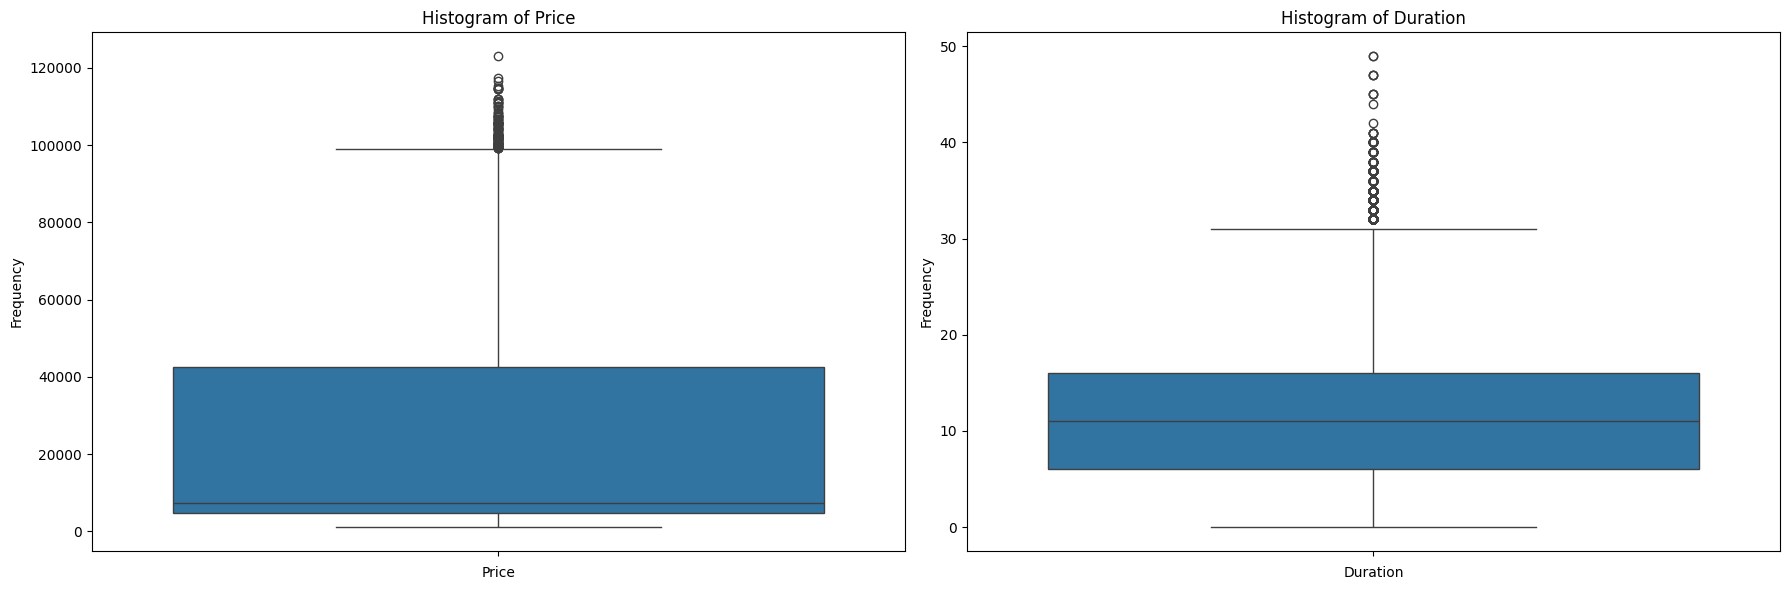

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(y='price', data=df, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.boxplot(y='duration', data=df, ax=axes[1])
axes[1].set_title('Histogram of Duration')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Remove outlier values from duration and price

In [50]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'duration')
df = remove_outliers(df, 'price')

In [51]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,298835.000000,298835.000000,298835.000000,298835.000000,298835.000000,298835.000000,298835.000000,298835.000000,298835.000000,298835.000000
mean,4.545756,3.427761,2.871916,0.922174,3.696816,3.421253,0.312135,11.687252,26.032657,20877.454244
std,1.918804,1.816092,1.416497,0.396334,1.352509,1.783990,0.463366,7.067600,13.551680,22662.363806
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1105.000000
25%,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,6.000000,15.000000,4772.000000
50%,3.000000,3.000000,3.000000,1.000000,4.000000,3.000000,0.000000,11.000000,26.000000,7425.000000
75%,7.000000,5.000000,4.000000,1.000000,5.000000,5.000000,1.000000,16.000000,38.000000,42521.000000
max,7.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000,31.000000,49.000000,99129.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298835 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           298835 non-null  int64
 1   source_city       298835 non-null  int64
 2   departure_time    298835 non-null  int64
 3   stops             298835 non-null  int64
 4   arrival_time      298835 non-null  int64
 5   destination_city  298835 non-null  int64
 6   class             298835 non-null  int64
 7   duration          298835 non-null  int32
 8   days_left         298835 non-null  int64
 9   price             298835 non-null  int64
dtypes: int32(1), int64(9)
memory usage: 23.9 MB


In [53]:
df['duration'].nunique()

32

# Barplot for Stops vs Duration and Stops vs price

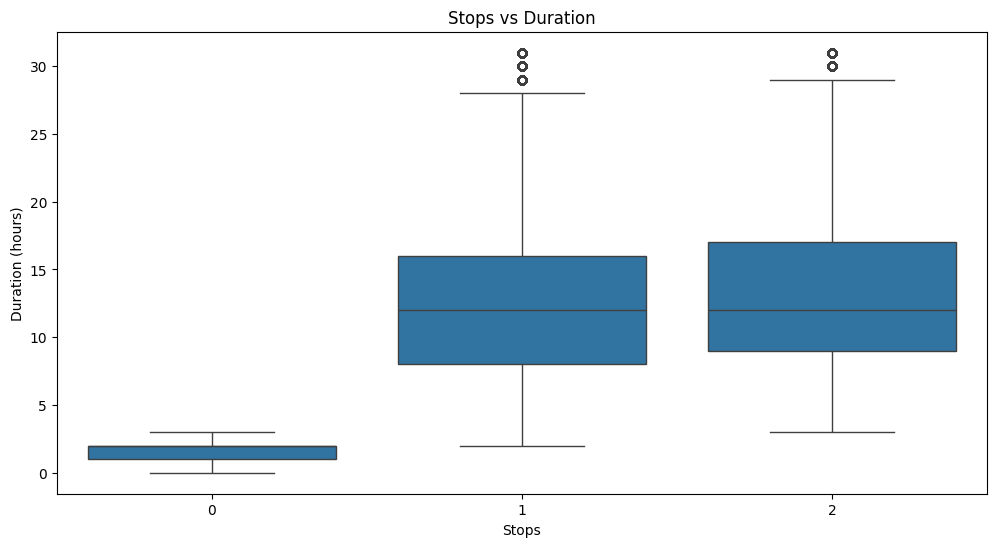

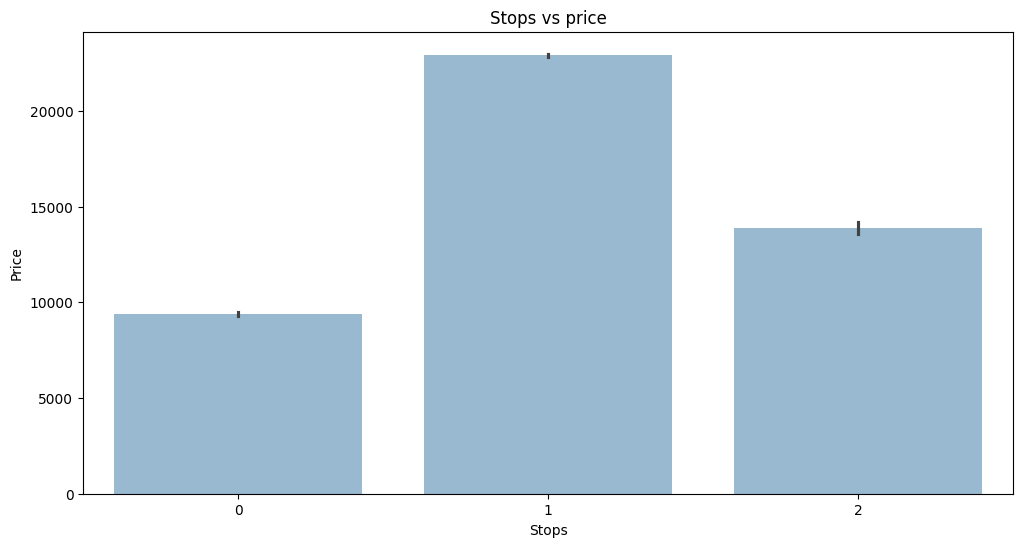

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stops', y='duration', data=df, order=[0, 1, 2])
plt.title('Stops vs Duration')
plt.xlabel('Stops')
plt.ylabel('Duration (hours)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='stops', y='price', data=df, alpha=0.5)
plt.title('Stops vs price')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()

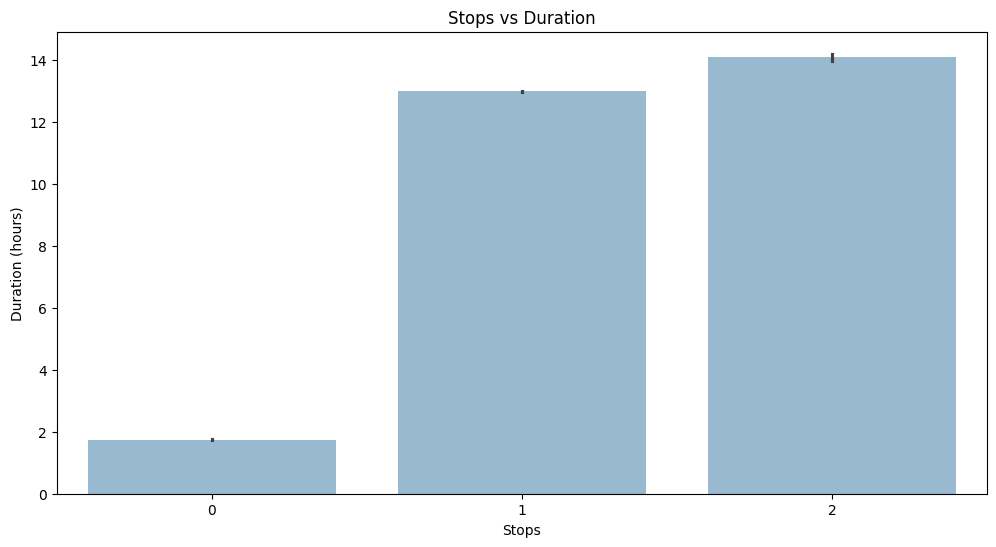

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='stops', y='duration', data=df, alpha=0.5, order=[0, 1, 2])
plt.title('Stops vs Duration')
plt.xlabel('Stops')
plt.ylabel('Duration (hours)')
plt.show()


In [56]:
grouped_data = df.groupby(['stops'])['price'].quantile(0.75).reset_index()
grouped_data

,stops,price
0,0,8064.0
1,1,48876.0
2,2,13240.0


In [57]:
grouped_data = df.groupby(['stops'])['duration'].quantile(0.75).reset_index()
grouped_data

,stops,duration
0,0,2.0
1,1,16.0
2,2,17.0


In [58]:
df1 = df['airline'].map({1 : 'SpiceJet' ,  2 : 'AirAsia', 3 :'Vistara', 5 : 'GO_FIRST',  6 : 'Indigo', 7 :'Air_India'})

grouped_data = df.groupby([df1])['price'].quantile(0.75).reset_index()
grouped_data

,airline,price
0,AirAsia,4589.0
1,Air_India,45883.0
2,GO_FIRST,6324.0
3,Indigo,6489.0
4,SpiceJet,7412.0
5,Vistara,55377.0


In [59]:
grouped_data = df.groupby([df1])['duration'].quantile(0.75).reset_index()
grouped_data

,airline,duration
0,AirAsia,11.0
1,Air_India,21.0
2,GO_FIRST,11.0
3,Indigo,7.0
4,SpiceJet,21.0
5,Vistara,16.0


In [60]:
# Use crosstab to create a contingency table of airline and stops
grouped_data = pd.crosstab(df1, df['stops'], normalize='index')

# Display the result
grouped_data

stops,0,1,2
airline,,,
AirAsia,0.151199,0.709281,0.139520
Air_India,0.080027,0.880115,0.039858
GO_FIRST,0.139084,0.843438,0.017477
Indigo,0.260111,0.722774,0.017115
SpiceJet,0.273222,0.726778,0.000000
Vistara,0.080567,0.871015,0.048419


In [61]:
# Group by 'stops' and calculate the mean duration and price
grouped_data_duration = df.groupby(['stops'])['duration'].mean().reset_index()
grouped_data_price = df.groupby(['stops'])['price'].mean().reset_index()

# Merge the two dataframes on 'stops'
grouped_data = pd.merge(grouped_data_duration, grouped_data_price, on='stops')

# Display the result
grouped_data


,stops,duration,price
0,0,1.747278,9375.938535
1,1,12.995310,22890.741091
2,2,14.099945,13864.803719


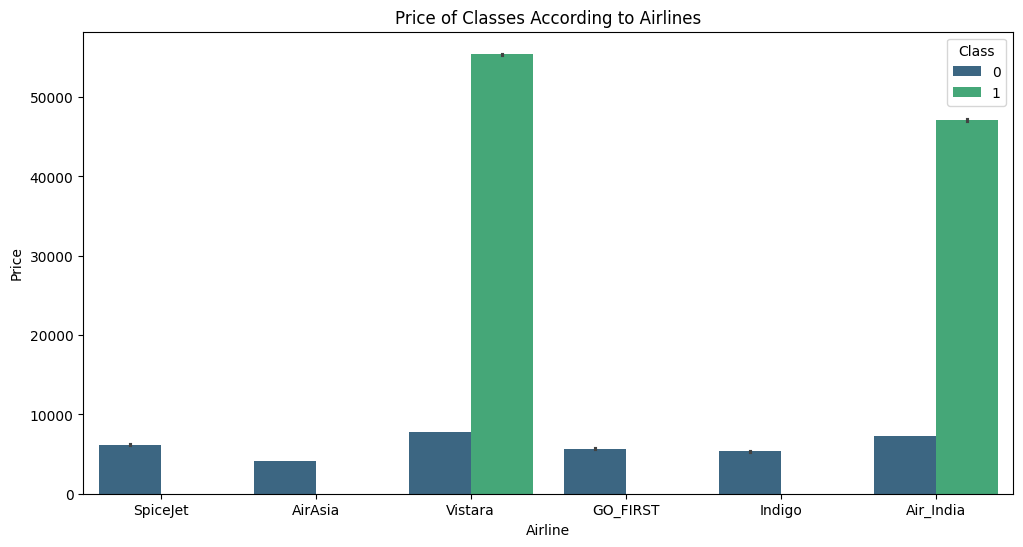

In [62]:
df1 = df['airline'].map({1 : 'SpiceJet' ,  2 : 'AirAsia', 3 :'Vistara', 5 : 'GO_FIRST',  6 : 'Indigo', 7 :'Air_India'})
plt.figure(figsize=(12, 6))
sns.barplot(x=df1, y='price', hue='class', data=df, palette='viridis')
plt.title('Price of Classes According to Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.legend(title='Class')
plt.show()


# find correlation rate between columns

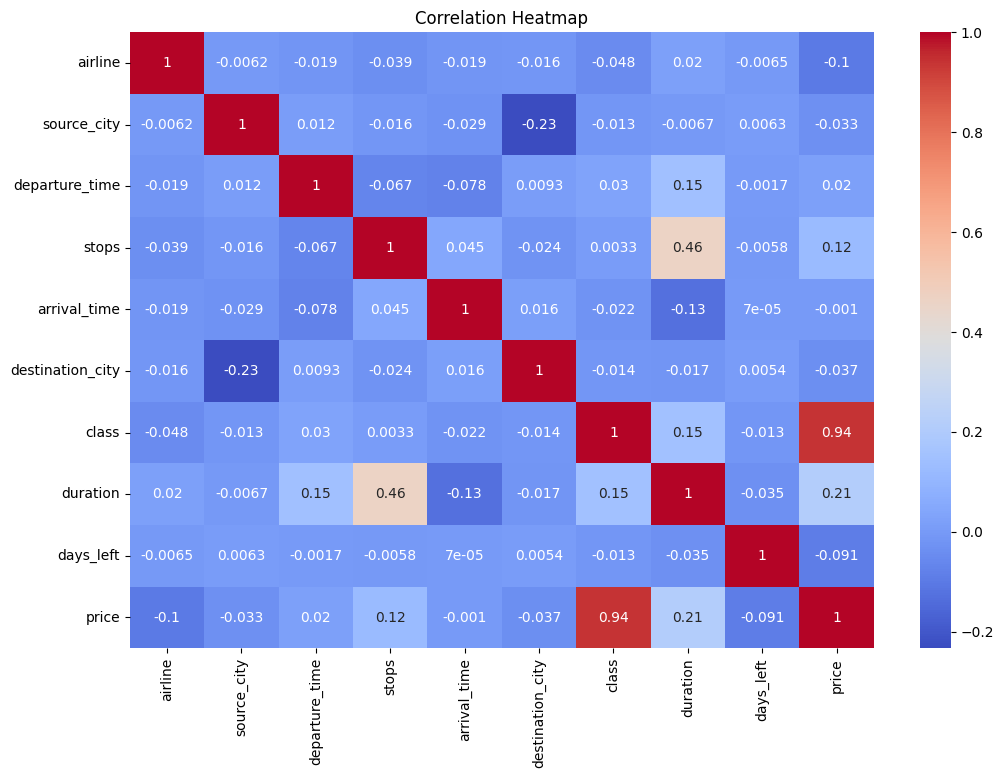

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Barplot for the columns

C:\Users\braje\AppData\Local\Temp\ipykernel_2096\696461027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette='viridis')


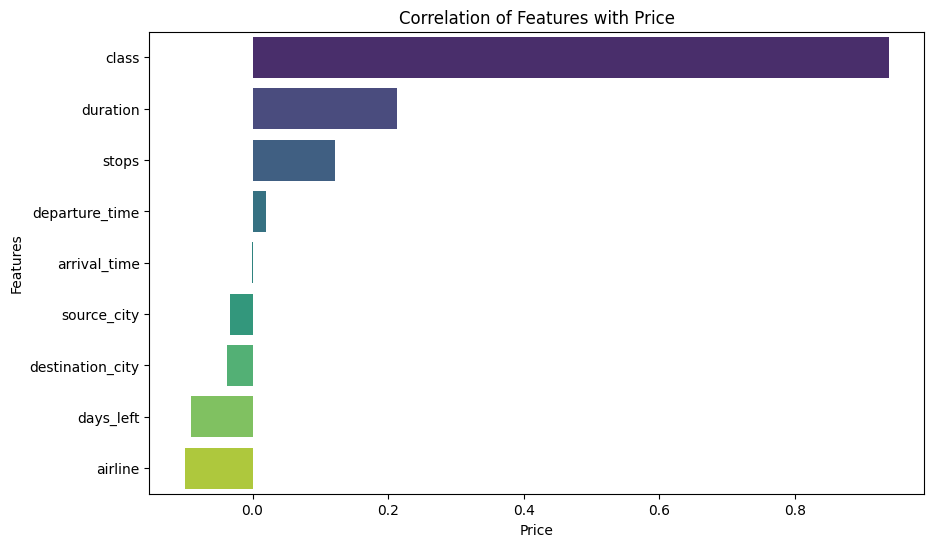

In [64]:
correlation_with_price = df.corr()['price'].sort_values(ascending=False)
correlation_with_price = correlation_with_price[correlation_with_price.index != 'price']

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.values, y=correlation_with_price.index, palette='viridis')
plt.title('Correlation of Features with Price')
plt.xlabel('Price')
plt.ylabel('Features')
plt.show()


# Price Distribution for Different Classes

C:\Users\braje\AppData\Local\Temp\ipykernel_2096\3125032237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='price', data=df, palette='viridis')


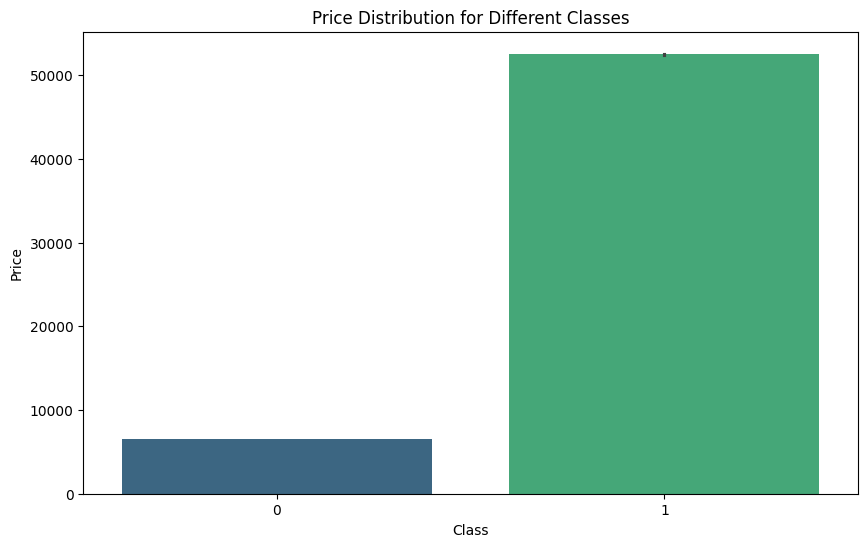

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='price', data=df, palette='viridis')
plt.title('Price Distribution for Different Classes')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()


# histogram for the duration of flight and ticket price

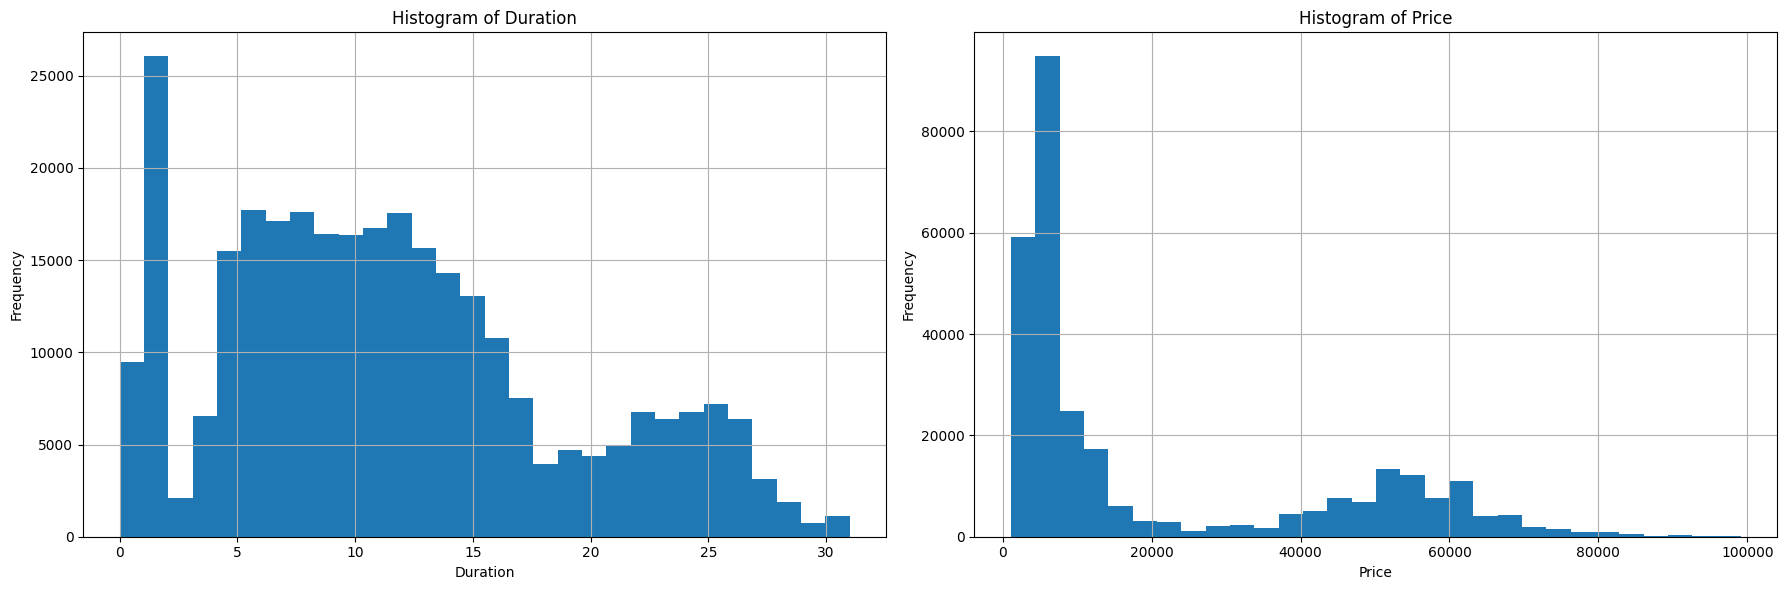

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

df['duration'].hist(bins=30, ax=axes[0])
axes[0].set_title('Histogram of Duration')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Frequency')

df['price'].hist(bins=30, ax=axes[1])
axes[1].set_title('Histogram of Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

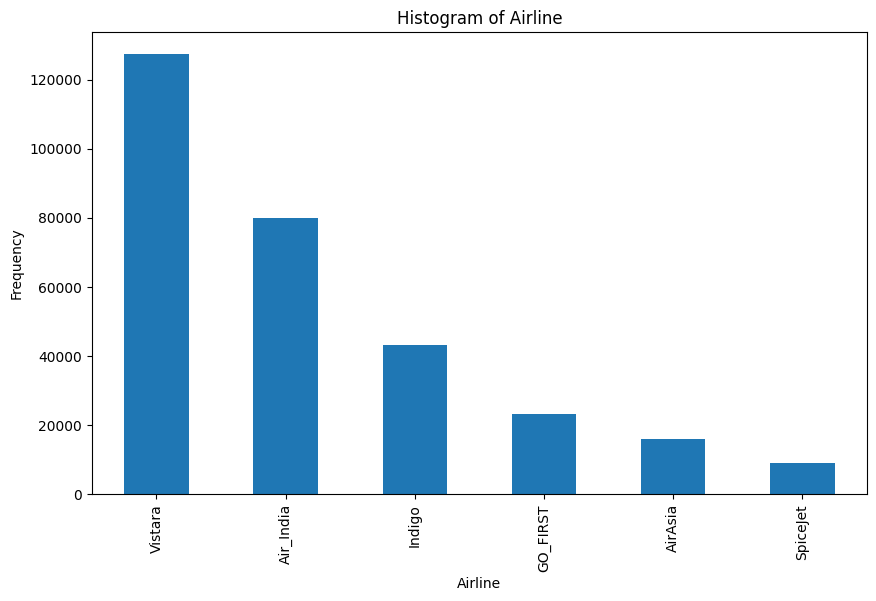

In [67]:
plt.figure(figsize=(10, 6))
df1.value_counts().plot(kind='bar')
plt.title('Histogram of Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x600 with 0 Axes>

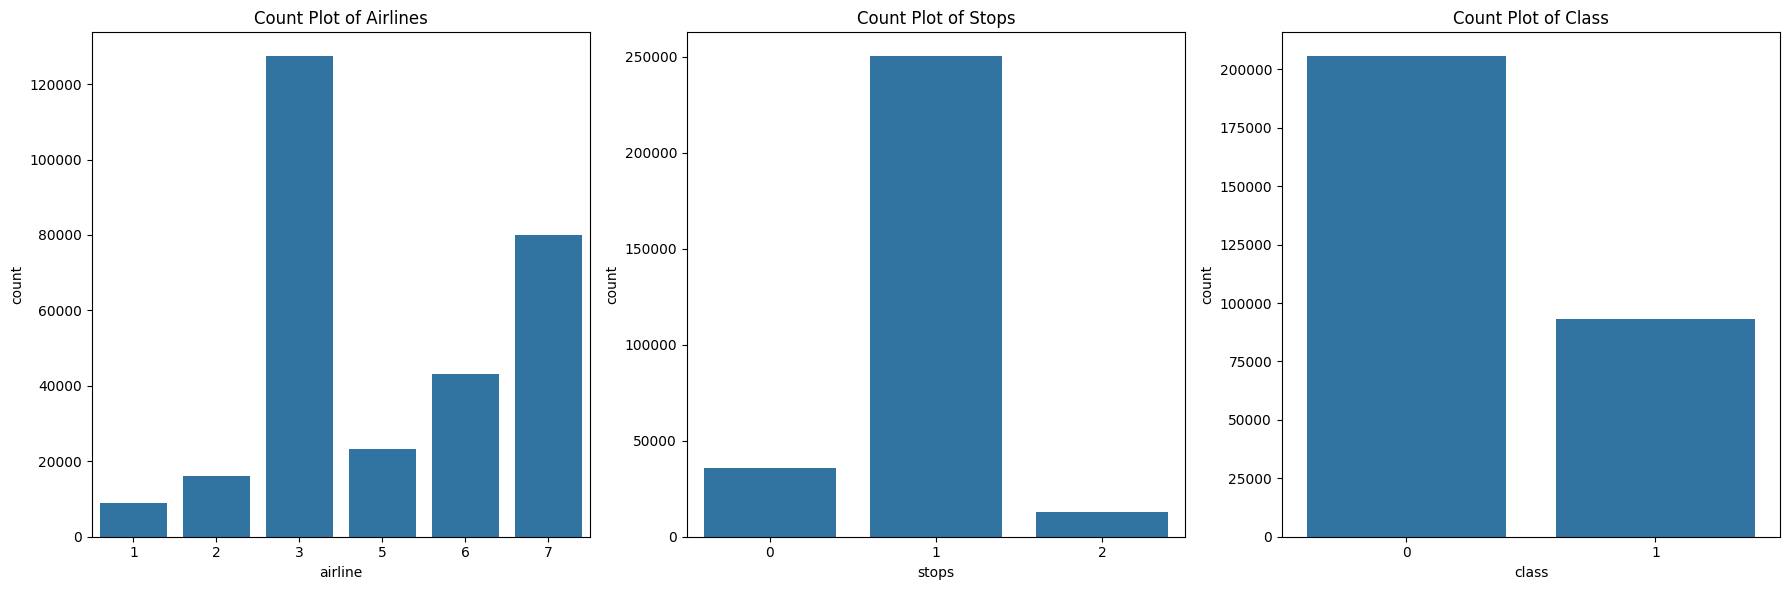

In [68]:
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='airline', data=df, ax=axes[0])
axes[0].set_title('Count Plot of Airlines')

sns.countplot(x='stops', data=df, ax=axes[1])
axes[1].set_title('Count Plot of Stops')

sns.countplot(x='class', data=df, ax=axes[2])
axes[2].set_title('Count Plot of Class')

plt.tight_layout()
plt.show()


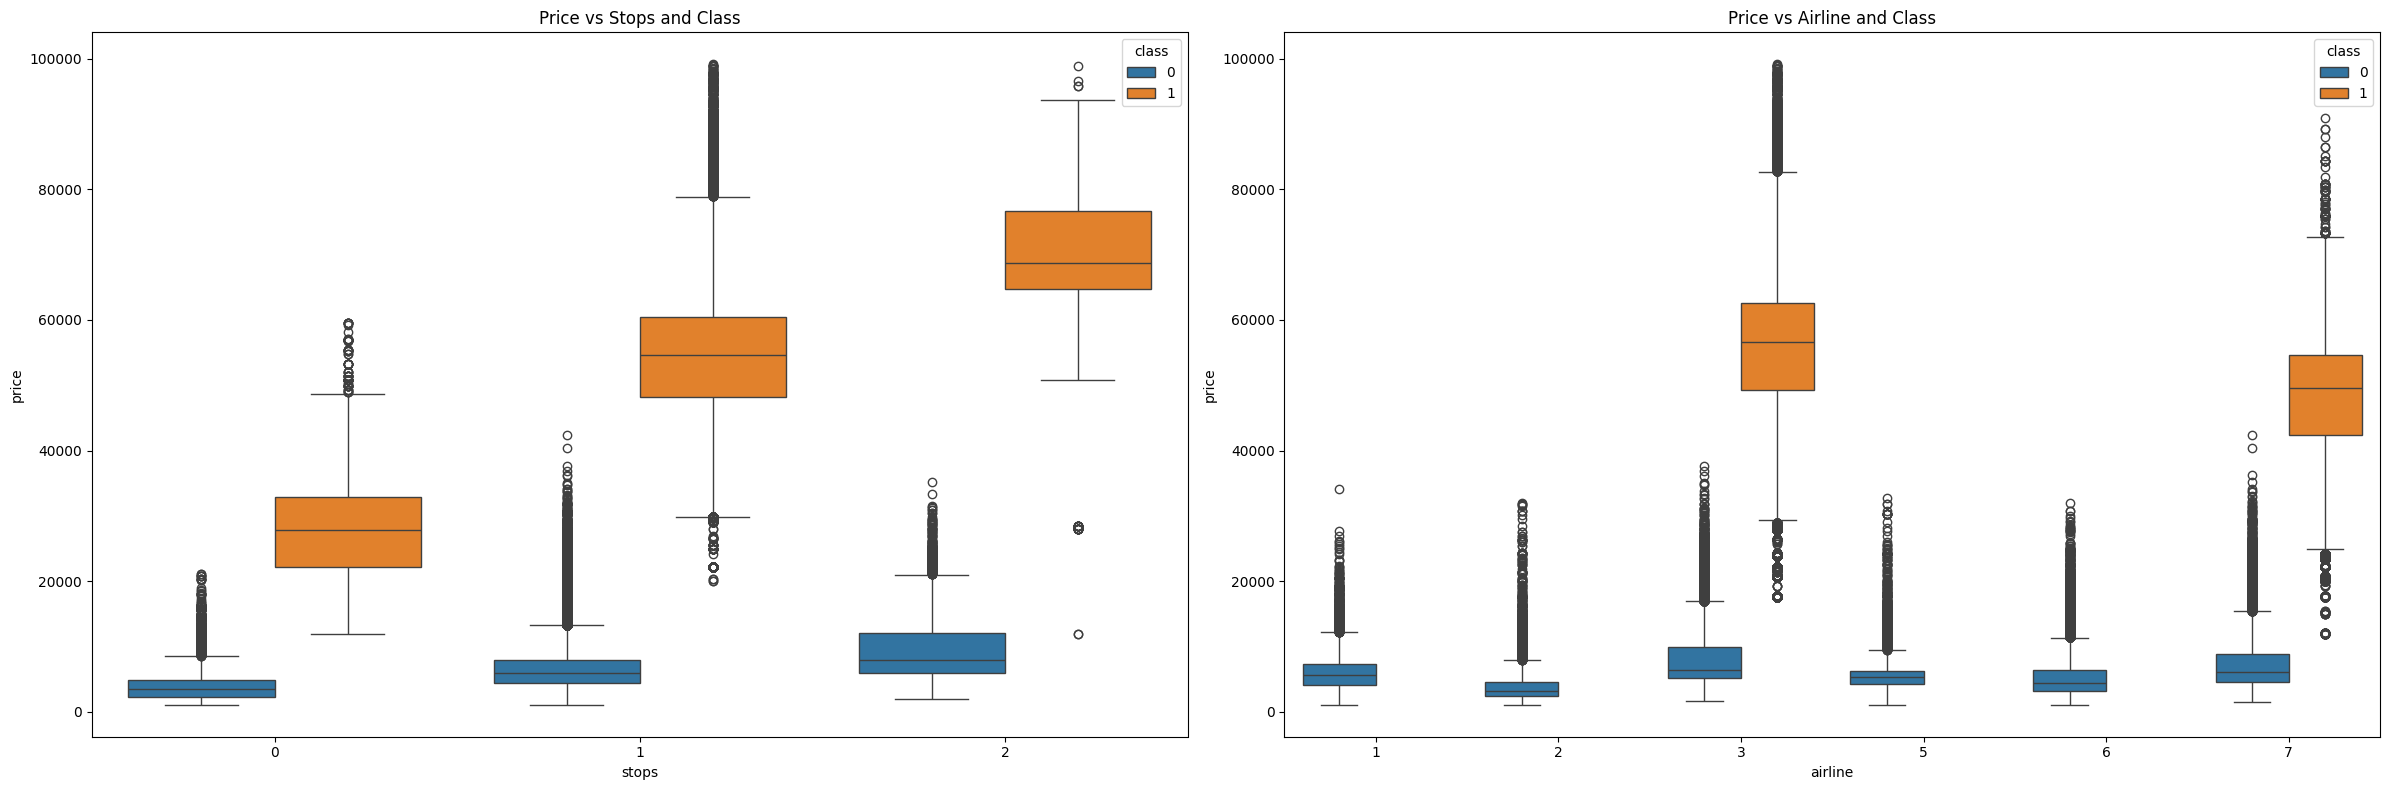

In [69]:

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.boxplot(x='stops', y='price', hue='class', data=df, ax=axes[0])
axes[0].set_title('Price vs Stops and Class')

sns.boxplot(x='airline', y='price', hue='class', data=df, ax=axes[1])
axes[1].set_title('Price vs Airline and Class')

plt.tight_layout()
plt.show()


In [70]:
df['duration'] = df['duration'].astype('int64').round()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298835 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           298835 non-null  int64
 1   source_city       298835 non-null  int64
 2   departure_time    298835 non-null  int64
 3   stops             298835 non-null  int64
 4   arrival_time      298835 non-null  int64
 5   destination_city  298835 non-null  int64
 6   class             298835 non-null  int64
 7   duration          298835 non-null  int64
 8   days_left         298835 non-null  int64
 9   price             298835 non-null  int64
dtypes: int64(10)
memory usage: 25.1 MB


# ML

Split the data for training and testing

In [72]:
correlation_matrix = df.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
top_5_columns = correlation_with_price.index[1:6]
top_5_columns


Index(['class', 'duration', 'stops', 'departure_time', 'arrival_time'], dtype='object')

In [73]:
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = df.drop(columns=['class'])
y = df['class']

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Verify the balance of the classes
class_distribution = resampled_data['class'].value_counts()
class_distribution


class
0    205558
1    205558
Name: count, dtype: int64

In [74]:
X = df[['class', 'duration', 'stops','departure_time','arrival_time','days_left']]
y = df['price']



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()


Use Linear Regression Model

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_test

array([-0.72916166,  1.741481  ,  1.74284827, ..., -0.60271196,
       -0.65854919, -0.7623729 ])

In [79]:
y_pred = model.predict(X_test)
y_pred

array([-0.62625792,  1.40286309,  1.42565229, ..., -0.76364249,
       -0.68875145, -1.02408601])

In [80]:
mean_error = mean_squared_error(y_test, y_pred)
score = model.score(X_test, y_test)

mean_error , score

(0.0969639491045763, 0.9026678882313164)

In [81]:
y_test

array([-0.72916166,  1.741481  ,  1.74284827, ..., -0.60271196,
       -0.65854919, -0.7623729 ])

In [82]:
model.coef_

array([ 0.93382395,  0.02560463,  0.10509501, -0.00211644,  0.01793757,
       -0.07725332])

Regression Plot for Actual price VS Predicted price

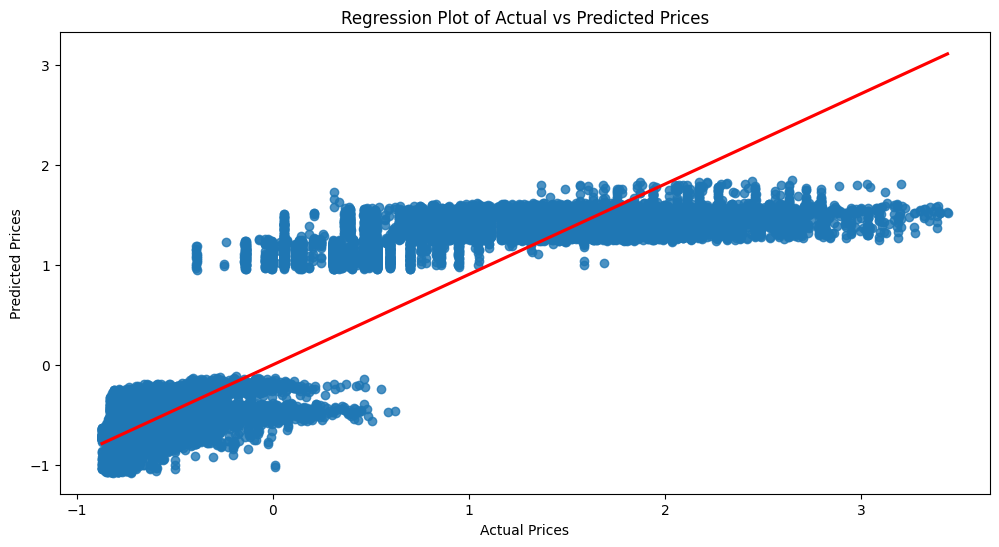

In [83]:
plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title('Regression Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [87]:
def preprocess_data(df):
    df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})
    df['class'] = df['class'].map({'Economy': 0, 'Business': 1})
    df['duration'] = df['duration'].astype(int).round()
    df['departure_time'] = df['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5})
    df['arrival_time'] = df['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5})
    return df

# Function to test the model on user provided inputs
def test_model_on_user_input(model, scaler):
    # Define the columns based on the dataset
    columns = ['class', 'duration', 'stops', 'departure_time', 'arrival_time', 'days_left']
    
    # Collect user inputs
    user_input = {
        'class': 'Economy',
        'duration': 2.17,
        'stops': 'zero',
        'departure_time': 'Evening',
        'arrival_time': 'Night',
        'days_left': 1
    }
    
    # Convert user input to DataFrame
    user_input_df = pd.DataFrame([user_input])
    
    # Preprocess the user input to match the training data format
    user_input_df = preprocess_data(user_input_df)
    
    # Scale the user input
    user_input_scaled = scaler.transform(user_input_df)
    
    # Predict the price using the model
    predicted_price = model.predict(user_input_scaled)
    
    print(f"Predicted Price: {predicted_price[0]}")

# Call the function to test the model on user input
test_model_on_user_input(model, scaler)

Predicted Price: -0.7503815685559868


In [88]:

# Rescale the predicted price to the original price
predicted_price = np.array([-0.7503815685559868]).reshape(-1, 1)
rescaled_price = y_scaler.inverse_transform(predicted_price)

# Print the rescaled predicted price
print(f"Rescaled Predicted Price: {rescaled_price[0][0]}")


Rescaled Predicted Price: 3866.879948880949
